In [1]:
import matplotlib.pyplot as plt
import neuropacks as packs
import numpy as np
import mpl_lego as mplego
import os
from settings import ax_label_size, tick_label_size, letter_size

from noise_correlations import analysis, utils
from mpl_lego.colors import hex_to_rgb
from mpl_lego.ellipse import plot_cov_ellipse

%matplotlib inline

In [2]:
ccycle = mplego.colors.get_default_ccycle()

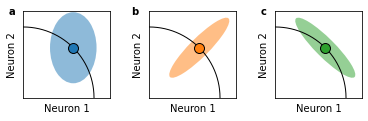

In [17]:
# Style settings
n_std = 0.6 # N. std for cov ellipses
cov_alpha = 0.5 # Opacity for cov ellipses
s_cov = 100 # Mean cov. scatter size
data_alpha = 0.25 # Opacity for data points
data_std = 2. # N. std for data ellipses
hist_linewidth = 1
mu_scatter_size = 30

# Create figure
figsize = (5, 1.5)
fig = plt.figure(figsize=figsize)
le = .05
re = .01
te = .05
be = .15
vg = .08
h = 1. - te - be
w = h * figsize[1] / figsize[0]
hg = (1. - le - re - 3*w) / 2.

var_axes = np.empty(3, dtype=object)
for ii in range(3):
    var_axes[ii] = fig.add_axes([le + ii*(w + hg), be, w, h])
axes = var_axes

"""
Bottom row: components of variability
"""
# Mean response curves
n1 = np.linspace(0, 1, 1000)
n2 = np.sqrt(1 - n1**2)
center = 1 / np.sqrt([2, 2])

# Plot mean response curves
for ax in var_axes:
    ax.plot(n1, n2, color='black', linewidth=1)
    
# Create private variability covariance
privax = var_axes[0]
private = np.array([[0.3, 0.],
                    [0., 0.7]])
# Plot private variance ellipse
plot_cov_ellipse(
    private,
    mu=center,
    ax=privax,
    facecolor=hex_to_rgb(ccycle[0], cov_alpha),
    n_std=n_std,
    include_mu=False)
# Plot center of ellipse (mean response)
privax.scatter(
    center[0],
    center[1],
    color=ccycle[0],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

# Create shared variability covariance
shareax = var_axes[1]
shared = np.array([[0.5, 0.45],
                   [0.45, 0.5]])
# Plot shared variability ellipse
plot_cov_ellipse(
    shared,
    mu=center,
    ax=shareax,
    facecolor=hex_to_rgb(ccycle[1], cov_alpha),
    n_std=n_std,
    include_mu=False)
# Plot center of ellipse (mean response)
shareax.scatter(
    center[0],
    center[1],
    color=ccycle[1],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

# Create differential correlations covariance
diffax = var_axes[2]
diff = np.array([[0.5, -0.45],
                 [-0.45, 0.5]])
# Plot differential correlation ellipse
plot_cov_ellipse(
    diff,
    mu=center,
    ax=diffax,
    facecolor=hex_to_rgb(ccycle[2], cov_alpha),
    n_std=n_std,
    include_mu=False)
diffax.scatter(
    center[0],
    center[1],
    color=ccycle[2],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

for ax in var_axes.ravel():
    ax.set_xlim([0, 1.22])
    ax.set_ylim([0, 1.22])
    # Axes labels
    ax.set_xlabel(r'Neuron 1', fontsize=ax_label_size, labelpad=6)
    ax.set_ylabel(r'Neuron 2', fontsize=ax_label_size, labelpad=6)
    ax.set_xticks([])
    ax.set_yticks([])

"""
Global Settings
"""
# Set axis tick label size
for ax in axes.ravel()[1:]:
    ax.tick_params(labelsize=tick_label_size)
# Apply subplot labels
xs = [.01, .35, .71]
y = .92
lets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
for ii in range(3):
    fig.text(xs[ii], y, lets[ii], size=letter_size, fontweight='bold')

plt.savefig('supp1.pdf', dpi=300)
plt.savefig('supp1.jpg', dpi=300)
plt.show()